In [1]:
import pandas as pd

df = pd.read_csv('data\insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
df.select_dtypes(include=['int64', 'float64'])

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#one-hot encoding of categorical features
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [8]:
#correlate 'charges' with rest of the features 
df2 = df.drop(columns='charges')
corrw = df2.corrwith(df['charges'])

### correlation bar graph

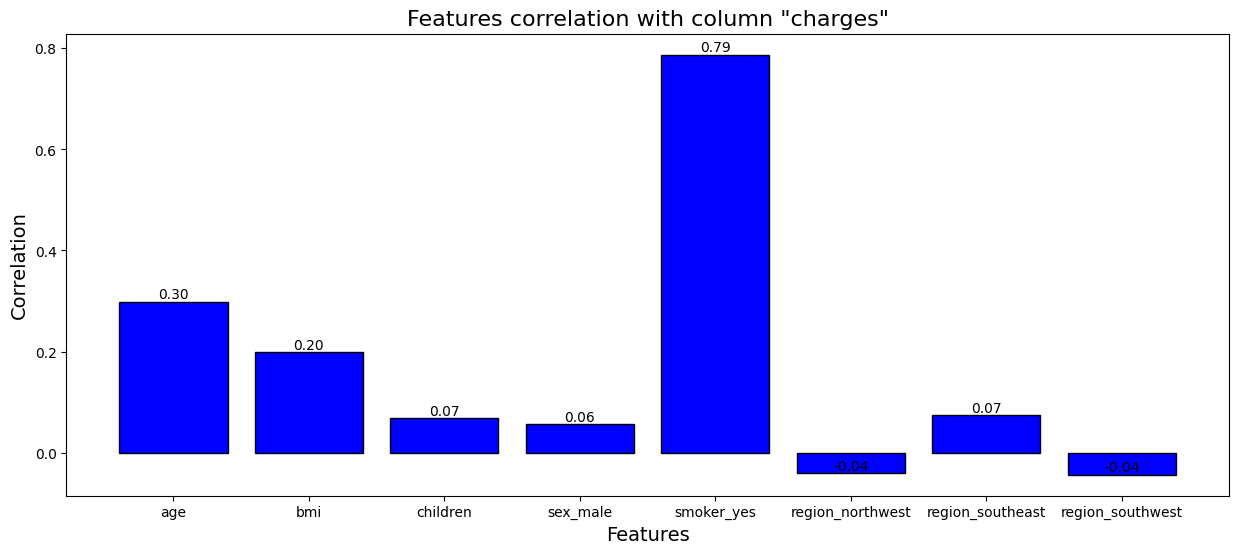

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

plt.title('Features correlation with column "charges"', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#annotate the bars
for i, v in enumerate(corrw.values):
    label = f"{v:.2f}"
    plt.annotate(label,(i,v), ha='center', va='bottom', fontsize=10)

plt.show()

### correlation heatmap

<AxesSubplot: title={'center': 'Feature correlation matrix'}>

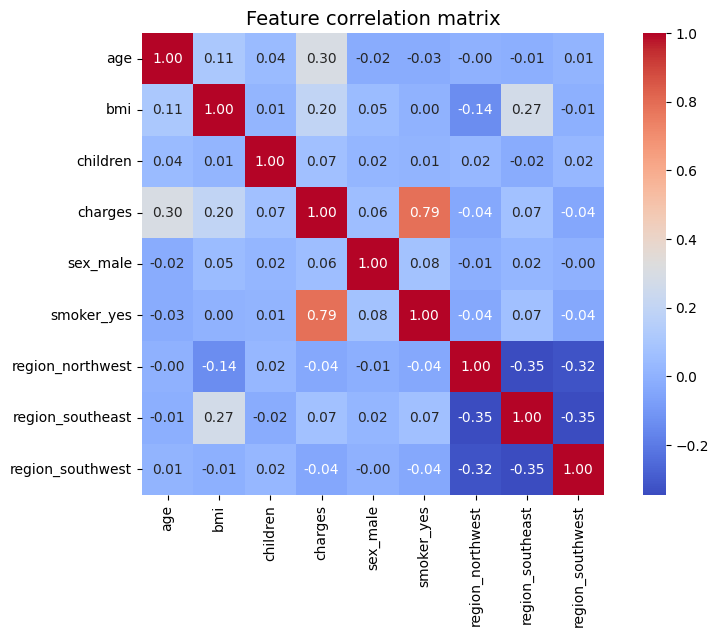

In [23]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,6))
plt.title('Feature correlation matrix', fontsize=14)

sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

## build the model

In [24]:
from sklearn.model_selection import train_test_split

#split data
X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# check data split
print(f'X_train', X_train.shape)
print(f'X_test', X_test.shape)
print(f'y_train', y_train.shape)
print(f'y_test', y_test.shape)

X_train (1070, 8)
X_test (268, 8)
y_train (1070,)
y_test (268,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#function to get metrics on model performance  
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def model_measurements(y_test, pred):
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression 
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)
pred = reg_lr.predict(X_test)

r2, mae, mse, rmse = model_measurements(y_test, pred)

results = pd.DataFrame(
    [['Linear Regression', r2, mae, mse, rmse]],
    columns=['Model', 'R-squared', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
)
results

,Model,R-squared,Mean absolute error,Mean squared error,Root mean squared error
0,Linear Regression,0.799988,3933.272649,3.182795e+07,5641.626559


### Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=0)
reg_rf.fit(X_train, y_train)
pred = reg_rf.predict(X_test)

r2, mae, mse, rmse = model_measurements(y_test, pred)

rf_results = pd.DataFrame(
    [['Random Forest Regression', r2, mae, mse, rmse]],
    columns=['Model', 'R-squared', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
)
results = results.append(rf_results, ignore_index = True)

results


C:\Users\kumarth\AppData\Local\Temp\ipykernel_5288\4056934355.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index = True)


,Model,R-squared,Mean absolute error,Mean squared error,Root mean squared error
0,Linear Regression,0.799988,3933.272649,3.182795e+07,5641.626559
1,Random Forest Regression,0.876335,2639.493448,1.967884e+07,4436.083957


### XGBoost Regressor 

In [50]:
from xgboost import XGBRFRegressor
reg_xgbr = XGBRFRegressor(random_state=0)
reg_xgbr.fit(X_train, y_train)
pred = reg_xgbr.predict(X_test)

r2, mae, mse, rmse = model_measurements(y_test, pred)

xgbr_results = pd.DataFrame(
    [['XGBoost Regressor', r2, mae, mse, rmse]],
    columns=['Model', 'R-squared', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
)
results = results.append(xgbr_results, ignore_index = True)

results


C:\Users\kumarth\AppData\Local\Temp\ipykernel_5288\311865043.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(xgbr_results, ignore_index = True)


,Model,R-squared,Mean absolute error,Mean squared error,Root mean squared error
0,Linear Regression,0.799988,3933.272649,3.182795e+07,5641.626559
1,Random Forest Regression,0.876335,2639.493448,1.967884e+07,4436.083957
2,XGBoost Regressor,0.894639,2480.589798,1.676602e+07,4094.633631


#### ToDo: cross validation, hyperparameter tuning.

### Save model

In [72]:
#Save the model for future runs
reg_xgbr.save_model(r'model\xgb_model.model')

In [73]:
import xgboost as xgb

xgb_trained_model = xgb.Booster()
xgb_trained_model.load_model(r'model\xgb_model.model')

### Testing with new values

In [74]:
#Check samples to prepare test data.   
df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


In [77]:
#Charges are not part of the training dataset. The model is trained to predict charges. 
#Provide test data without charges 
customer = [[26,31.2,0,0,1,1,0,0],[42,54.2,1,1,1,0,1,0],[44,54.2,1,1,0,0,1,0]]
data = scaler.transform(customer)
dtrain = xgb.DMatrix(data)
xgb_trained_model.predict(dtrain)

c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([34799.426, 45280.676,  9201.362], dtype=float32)